<a href="https://colab.research.google.com/github/vishvas-chauhan/First_Repository/blob/master/Webscript_Begin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip install bs4 (install if required)
from bs4 import BeautifulSoup
import requests

In [3]:
url = "https://fr.fashionjobs.com/s/?categories=0&regions=0&metier=&keyword=analyst"
#url = "https://fr.fashionjobs.com/"
html= requests.get(url)

In [4]:
html
#200 is ok, 404 is not ok, 400 I think permission required

<Response [200]>

In [5]:
#collect all text now :)
html_text = html.text

In [6]:
soup = BeautifulSoup(html_text,'lxml')


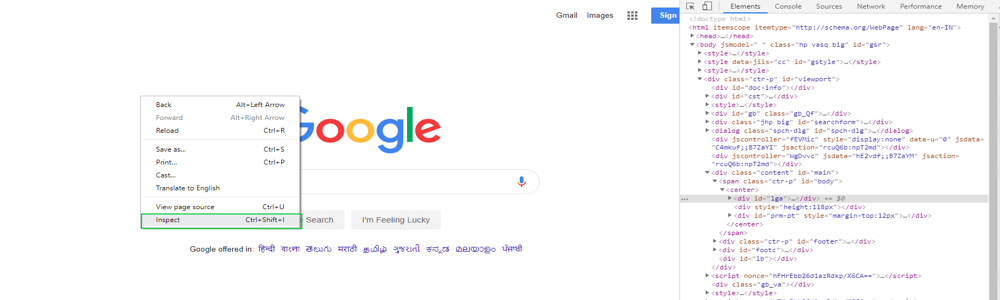

In [7]:
#please read some html file overview..
#press Ctrl+shift+I on your url screen
url_inspect = "https://media.geeksforgeeks.org/wp-content/uploads/20191023122339/inspect1111.png"
from PIL import Image 
im = Image.open(requests.get(url_inspect, stream=True).raw)
im.resize((1000,300))

from google.colab import files
from io import BytesIO
from PIL import Image

#uploaded = files.upload() 
#im = Image.open(BytesIO(uploaded['Image_file_name.jpg']))

In [352]:
import re
job_all = soup.find_all('div', class_="media__body list-ui__faux-block-link")
def fun():
  c1=[]
  c2=[]
  c3=[]
  c4=[]

  for job in job_all:
    contract = job.find('div', class_="media__misc").text
    link =job.find('a', class_="media__title").get('href')
    title =job.find('a', class_="media__title").text
    time= job.find('span',class_="time-ago__text").text
    contract = ''.join(i for i in contract if not i.isdigit())
    contract= re.sub('\W+',' ', contract).split(' ')[1]

    c1.append(contract)
    c2.append(link)
    c3.append(title)
    c4.append(time)
  
  return c1,c2,c3,c4
    #print(f"contrat type : {contract}")
    #print(f" url :{link}")
    #print(f"job title : {title}")
    #print(f"posting time {time}")

    #time= pd.to_datetime(time)
    #print(re.sub('\W+','', contract))



In [353]:
a,b,c,d=fun()

In [437]:
df =pd.DataFrame({'type':a,'url':b,'job title':c,'time':d})

In [438]:
df['job title'] = df['job title'].str[1:-1]

In [439]:
df.head(2)

,type,url,job title,time
0,Stage,https://fr.fashionjobs.com/emploi/Stage-busine...,Stage - Business & Data Analyst,11:58
1,Stage,https://fr.fashionjobs.com/emploi/Data-analyst...,Data Analyst Junior,28/07


In [440]:
import datetime
date_today= datetime.datetime.now().date().day
date_today


29

In [441]:
type(df.time)

pandas.core.series.Series

In [442]:
df['day'] = df.time.str[:2]

In [443]:
import numpy as np
df['timeout'] =np.where(df.time.str.contains(':'),'Today',abs(df.day.astype('int')-date_today))
df


,type,url,job title,time,day,timeout
0,Stage,https://fr.fashionjobs.com/emploi/Stage-busine...,Stage - Business & Data Analyst,11:58,11,Today
1,Stage,https://fr.fashionjobs.com/emploi/Data-analyst...,Data Analyst Junior,28/07,28,1
2,CDI,https://fr.fashionjobs.com/emploi/Business-ana...,Business Analyst H/F,26/07,26,3
3,CDI,https://fr.fashionjobs.com/emploi/Chef-de-proj...,Chef de Projet Omnicanal H/F,26/07,26,3
4,Stage,https://fr.fashionjobs.com/emploi/Business-ana...,Business Analyst (H/F) - Stage,26/07,26,3
5,CDI,https://fr.fashionjobs.com/emploi/Business-ana...,Business Analyst E-Commerce (H/F) - CDI,23/07,23,6
6,CDI,https://fr.fashionjobs.com/emploi/Retail-manag...,Retail Manager - France,23/07,23,6
7,Stage,https://fr.fashionjobs.com/emploi/Assitant-e-a...,Assitant.e Achats - Stage,23/07,23,6
8,CDI,https://fr.fashionjobs.com/emploi/Business-ana...,Business Analyst Omnicanal H/F,23/07,23,6
9,Stage,https://fr.fashionjobs.com/emploi/Stage-retail...,Stage - Retail & Finance Assistant Business An...,22/07,22,7


In [450]:
def nfun(x):
  if x>27:
    val= 'this'
  else:
    val = 'that'
  return val
df.day.astype('int').apply(nfun)

0     that
1     this
2     that
3     that
4     that
5     that
6     that
7     that
8     that
9     that
10    that
11    that
12    that
13    that
14    that
15    that
16    that
17    that
18    that
19    that
20    that
21    that
22    that
23    that
24    that
25    that
26    that
27    that
28    that
29    that
30    that
31    that
32    that
33    that
34    this
Name: day, dtype: object